In [0]:
import pandas as pd
import numpy as np
import torch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [15]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
import torchvision
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import torch.nn.functional as F

In [0]:
train_loader = torch.utils.data.DataLoader(datasets.MNIST("/content/gdrive/My Drive/MNIST Data",train=True, download=True,
               transform=transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.1307,), (0.3081,))])),
               batch_size=50, shuffle=True)

test_loader = torch.utils.data.DataLoader(datasets.MNIST("/content/gdrive/My Drive/MNIST Data", train=False, download=True,
              transform=transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.1307,), (0.3081,))])),
              batch_size=50, shuffle=True)

**Display a few Images**

In [0]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [0]:
batch_id, (plot_data,target) = next(enumerate(train_loader))

torch.Size([50, 1, 28, 28])


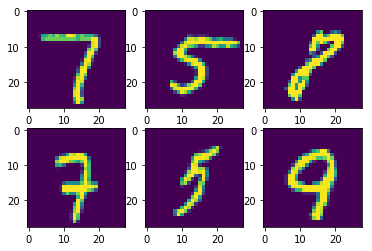

In [20]:
print (plot_data.shape)
for i in range(0,6):
  plt.subplot(2,3,i+1)
  plt.imshow(plot_data[i][0])

In [0]:
class Network(torch.nn.Module):
  def __init__(self, D_in, H, D_out):
    super(Network, self).__init__()
    self.linear1 = torch.nn.Linear(D_in,H)
    self.linear2 = torch.nn.Linear(H,H)
    # torch.nn.init.xavier_uniform_(self.linear2.weight)
    self.linear3 = torch.nn.Linear(H,H)
    # torch.nn.init.xavier_uniform_(self.linear3.weight)
    self.linear4 = torch.nn.Linear(H,H)
    # torch.nn.init.xavier_uniform_(self.linear4.weight)
    self.linear5 = torch.nn.Linear(H,H)
    # torch.nn.init.xavier_uniform_(self.linear5.weight)
    self.linear6 = torch.nn.Linear(H,H)
    # torch.nn.init.xavier_uniform_(self.linear6.weight)
    self.linear7 = torch.nn.Linear(H,D_out)

  def forward(self, x):
    output1 = F.relu(self.linear1(x))
    output2 = F.relu(self.linear2(output1))
    output3 = F.relu(self.linear3(output2))
    output4 = F.relu(self.linear4(output3))
    output5 = F.relu(self.linear5(output4))
    output6 = F.relu(self.linear6(output5))
    output = F.log_softmax(self.linear7(output6), dim = 1)
    output_list = []
    output_list = [output1,output2,output3,output4,output5,output6,output]
    return output_list

In [0]:
N, D_in, D_out, H = 50, 784, 10, 1024

In [23]:
epochs = 20
learning_rate = 0.001
model = Network(D_in, H, D_out).to(device)
lossFunction = torch.nn.NLLLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
print (model)

Network(
  (linear1): Linear(in_features=784, out_features=1024, bias=True)
  (linear2): Linear(in_features=1024, out_features=1024, bias=True)
  (linear3): Linear(in_features=1024, out_features=1024, bias=True)
  (linear4): Linear(in_features=1024, out_features=1024, bias=True)
  (linear5): Linear(in_features=1024, out_features=1024, bias=True)
  (linear6): Linear(in_features=1024, out_features=1024, bias=True)
  (linear7): Linear(in_features=1024, out_features=10, bias=True)
)


In [24]:
for epoch in range(0,epochs):
  for i, (images,labels) in enumerate(train_loader):
    images = images.reshape(-1,28*28).to(device)
    labels = labels.to(device)
    # show_batch(images)
    _,_,_,_,_,_,y_pred = model(images)
    loss = lossFunction(y_pred, labels)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if i % 100 == 99:
        print(i, loss.item())

99 0.3655993640422821
199 0.4285322427749634
299 0.2097017616033554
399 0.2750634253025055
499 0.3525734841823578
599 0.1987628936767578
699 0.49454623460769653
799 0.08678003400564194
899 0.26761242747306824
999 0.21164582669734955
1099 0.08856201171875
1199 0.13476870954036713
99 0.42449942231178284
199 0.2643823027610779
299 0.4082212746143341
399 0.23305650055408478
499 0.04598719999194145
599 0.24467551708221436
699 0.06844466924667358
799 0.06632295995950699
899 0.04303157702088356
999 0.07278585433959961
1099 0.0892019271850586
1199 0.07781250029802322
99 0.30416762828826904
199 0.13926033675670624
299 0.06686399132013321
399 0.008392448537051678
499 0.04795503616333008
599 0.19295036792755127
699 0.10877340286970139
799 0.018036145716905594
899 0.2134646624326706
999 0.09405717253684998
1099 0.298781156539917
1199 0.20848695933818817
99 0.03338702768087387
199 0.04863600805401802
299 0.0425819531083107
399 0.15758411586284637
499 0.1521087884902954
599 0.14673173427581787
699 0

In [0]:
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        _,_,_,_,_,_, outputs = model(images)
        ### this returns index and max value as a tuple, predicted will have index ###
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

In [26]:
correct/total * 100

98.02

## Part 1.3

In [0]:
import random

In [0]:
sample_loader = torch.utils.data.DataLoader(datasets.MNIST("/content/gdrive/My Drive", train=False, download=True,
              transform=transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.1307,), (0.3081,))])),
              batch_size=1000, shuffle=True)

In [0]:
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in sample_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        output1,output2,output3,output4,output5,output6,outputs = model(images)
        ### this returns index and max value as a tuple, predicted will have index ###
        _, predicted = torch.max(outputs.data, 1)
        _, hidden_5 = torch.max(output6.data,1)

In [0]:
img_index = {}
for i in range(0,10):
  temp = []
  count = 0
  for j in range(0,1000):
    if ((predicted.cpu().numpy()[j] == i) and count < 11):
      temp.append(j)
      img_index[i] = temp
      count = count + 1

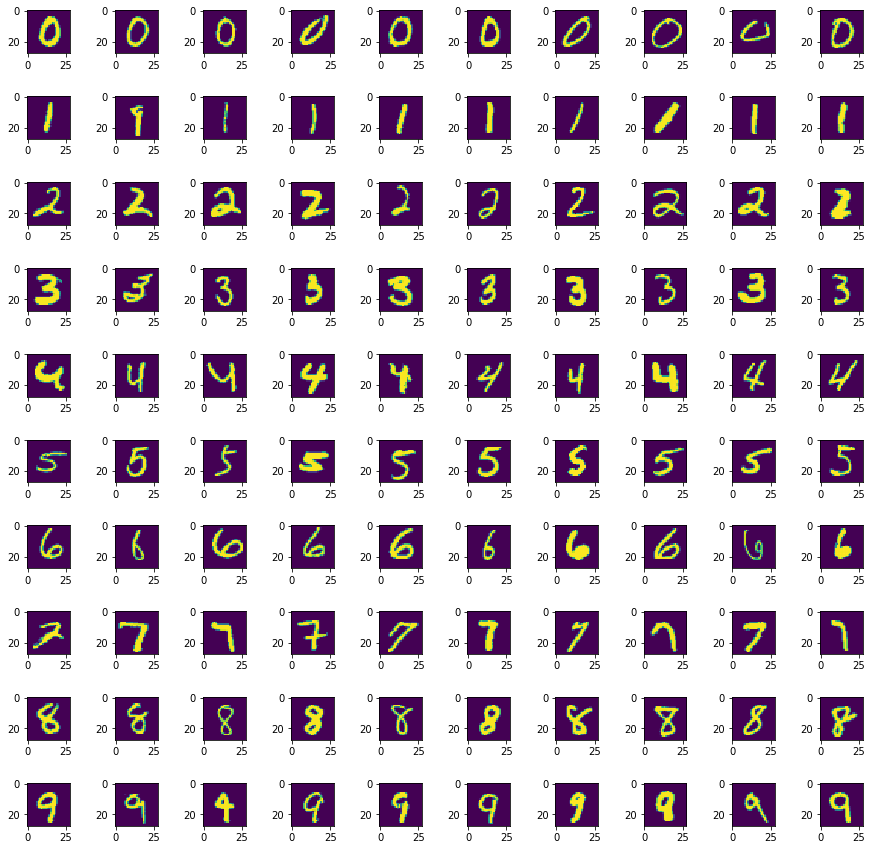

In [31]:
fig, axes = plt.subplots(10, 10,figsize=(15,15))
fig.subplots_adjust(hspace=1, wspace=1)
for i in range(0,10):
  for j in range(0,10):
    axes[i,j].imshow(images[img_index[i][j]].view(28,28).cpu())

## Part 1.4

In [0]:
random_num = random.sample(range(1024), 10)

In [0]:
dic = {}
for i in range(0,len(hidden_5)):
    if hidden_5[i].item() in dic:
        dic[hidden_5[i].item()].append(i)
    else:
        dic[hidden_5[i].item()] = [i]

In [0]:
dic2 = {}
for key in dic.keys():
    if key not in dic2.keys():
        dic2[key] = count
        count = count + 1
        
for i in dic.keys():
  try:
    dic[i] = random.sample(dic[i], 10)
  except:
    continue

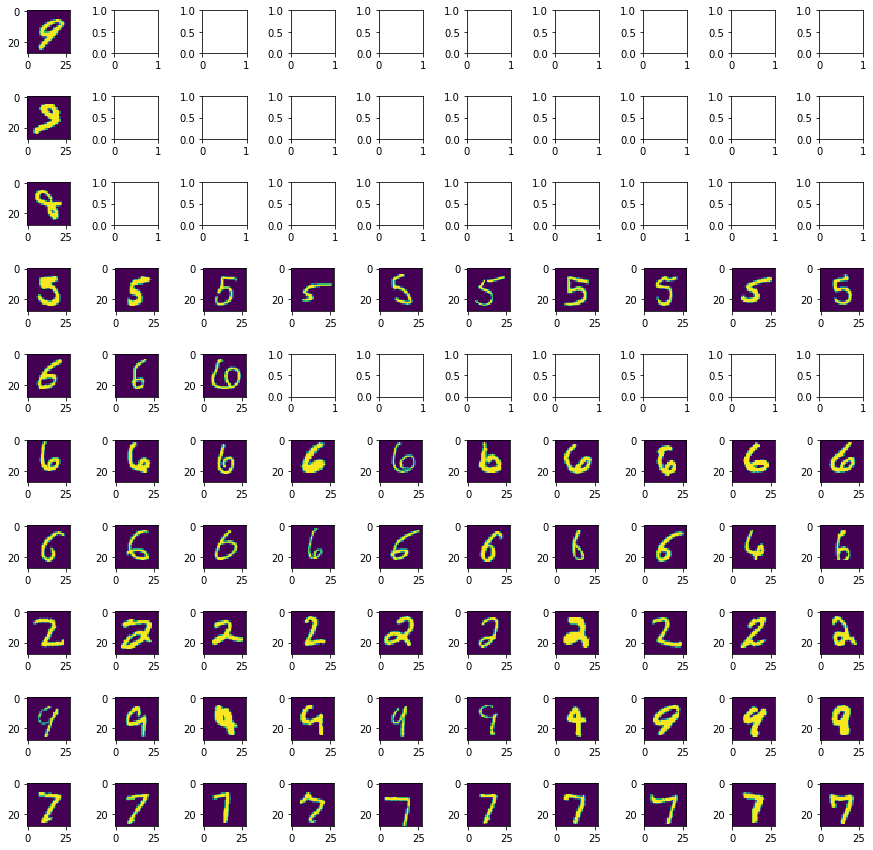

In [35]:
fig, axes = plt.subplots(10, 10,figsize=(15,15))
fig.subplots_adjust(hspace=1, wspace=1)
i = -1
for key in random.sample(dic.keys(), 10):
  i=i+1
  try:
    for j in range(0,10):
      axes[i,j].imshow(images[dic[key][j]].view(28,28).cpu())
  except:
    continue

## Part 1.5/1.6 - PCA/tSNE for MNIST dataset


In [0]:
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import random

In [0]:
test_images = images.cpu().numpy()
test_images = StandardScaler().fit_transform(test_images)

In [0]:
pca = PCA(n_components= 2)
principal_components = pca.fit_transform(test_images)

tsne = TSNE(n_components=2)
tsne_components = tsne.fit_transform(test_images)

In [0]:
### Creating a dictionary with labels and corresponding indices ###
plot_dict = {}
for key in np.unique(labels.cpu().numpy()):
  label_list = []
  for i in range(0,1000):
    if labels[i].item() == key:
      label_list.append(i)
      plot_dict[key] = label_list

<Figure size 432x288 with 0 Axes>

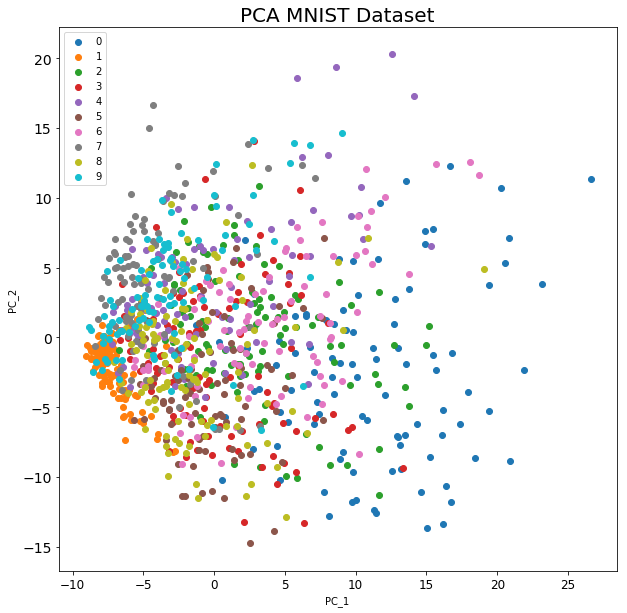

In [40]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('PC_1')
plt.ylabel('PC_2')
plt.title("PCA MNIST Dataset",fontsize=20)

### Plotting all labels with different colors ###
for label in np.unique(labels.cpu().numpy()):
  plt.scatter(principal_components[plot_dict[label],0], principal_components[plot_dict[label],1], cmap =plt.cm.get_cmap('gist_ncar', 10))
plt.legend(np.unique(labels.cpu().numpy()))

<Figure size 432x288 with 0 Axes>

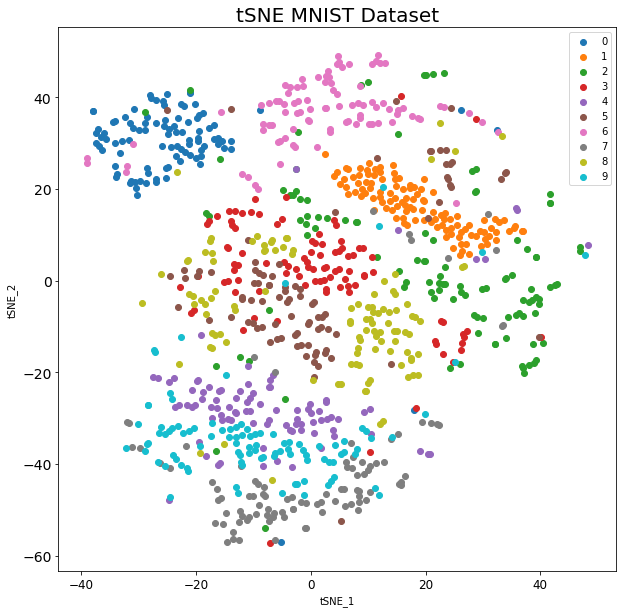

In [41]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('tSNE_1')
plt.ylabel('tSNE_2')
plt.title("tSNE MNIST Dataset",fontsize=20)

### Plotting all labels with different colors ###
for label in np.unique(labels.cpu().numpy()):
  plt.scatter(tsne_components[plot_dict[label],0], tsne_components[plot_dict[label],1], cmap =plt.cm.get_cmap('gist_ncar', 10))
plt.legend(np.unique(labels.cpu().numpy()))

## Part 1.7 - Implementing PCA and tSNE for all layers

In [0]:
def plot_pca_hidden(hidden_layer,layer_number):
  test_images = hidden_layer.cpu().numpy()
  test_images = StandardScaler().fit_transform(test_images)

  pca = PCA(n_components= 2)
  principal_components = pca.fit_transform(test_images)

  ### Creating a dictionary with labels and corresponding indices ###
  plot_dict = {}
  for key in np.unique(labels.cpu().numpy()):
    label_list = []
    for i in range(0,1000):
      if labels[i].item() == key:
        label_list.append(i)
        plot_dict[key] = label_list

  plt.figure()
  plt.figure(figsize=(10,10))
  plt.xticks(fontsize=12)
  plt.yticks(fontsize=14)
  plt.xlabel('PC_1')
  plt.ylabel('PC_2')
  plt.title("PCA - Hidden layer "+str(layer_number),fontsize=20)

  ### Plotting all labels with different colors ###
  for label in np.unique(labels.cpu().numpy()):
    plt.scatter(principal_components[plot_dict[label],0], principal_components[plot_dict[label],1], cmap =plt.cm.get_cmap('gist_ncar', 10))
  plt.legend(np.unique(labels.cpu().numpy()))

In [0]:
def plot_tsne_hidden(hidden_layer,layer_number):
  test_images = hidden_layer.cpu().numpy()
  test_images = StandardScaler().fit_transform(test_images)

  tsne = TSNE(n_components=2)
  tsne_components = tsne.fit_transform(test_images)

  ### Creating a dictionary with labels and corresponding indices ###
  plot_dict = {}
  for key in np.unique(labels.cpu().numpy()):
    label_list = []
    for i in range(0,len(hidden_layer)):
      if labels[i].item() == key:
        label_list.append(i)
        plot_dict[key] = label_list

  plt.figure()
  plt.figure(figsize=(10,10))
  plt.xticks(fontsize=12)
  plt.yticks(fontsize=14)
  plt.xlabel('tSNE_1')
  plt.ylabel('tSNE_2')
  plt.title("tSNE - Hidden layer "+str(layer_number),fontsize=20)

  ### Plotting all labels with different colors ###
  for label in np.unique(labels.cpu().numpy()):
    plt.scatter(tsne_components[plot_dict[label],0], tsne_components[plot_dict[label],1], cmap =plt.cm.get_cmap('gist_ncar', 10))
  plt.legend(np.unique(labels.cpu().numpy()))

In [0]:
layers = [output1,output2,output3,output4,output5,output6,outputs]

/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memo

<Figure size 432x288 with 0 Axes>

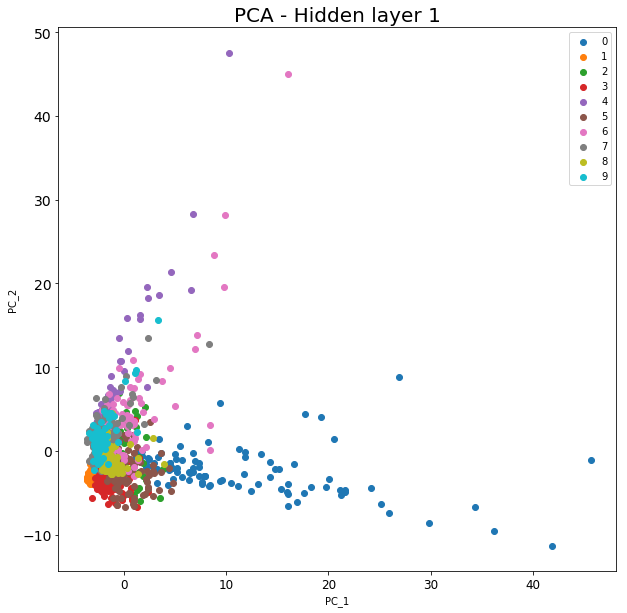

<Figure size 432x288 with 0 Axes>

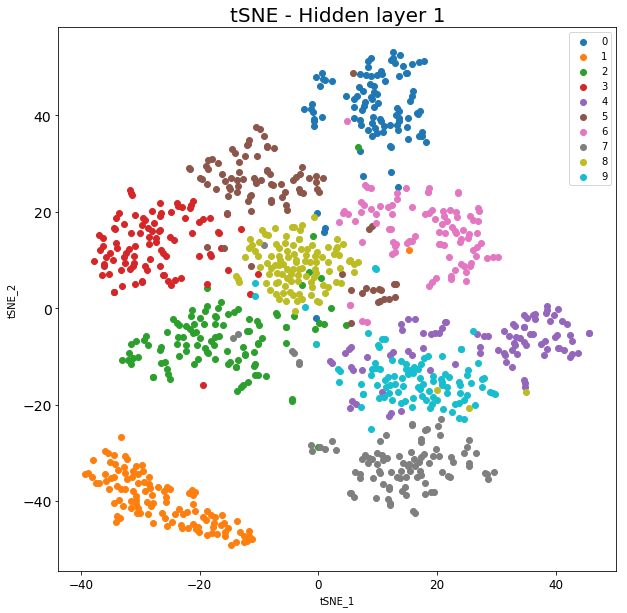

<Figure size 432x288 with 0 Axes>

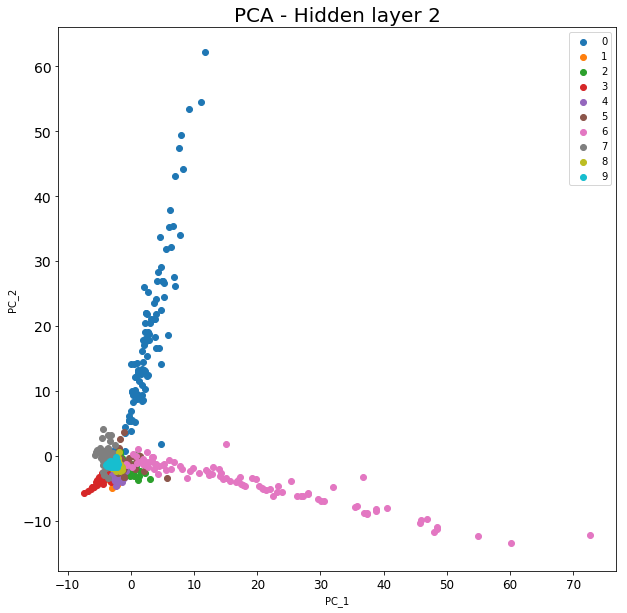

<Figure size 432x288 with 0 Axes>

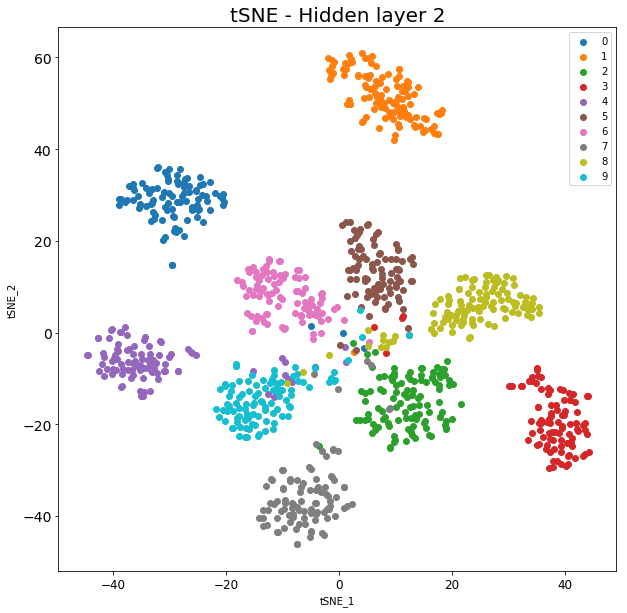

<Figure size 432x288 with 0 Axes>

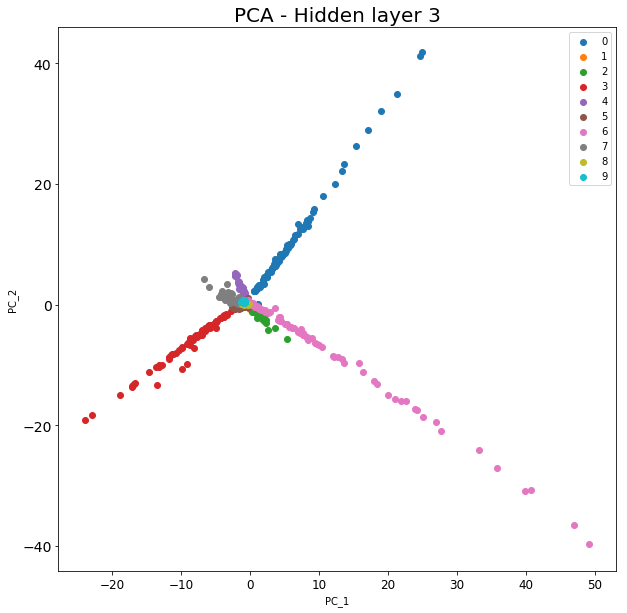

<Figure size 432x288 with 0 Axes>

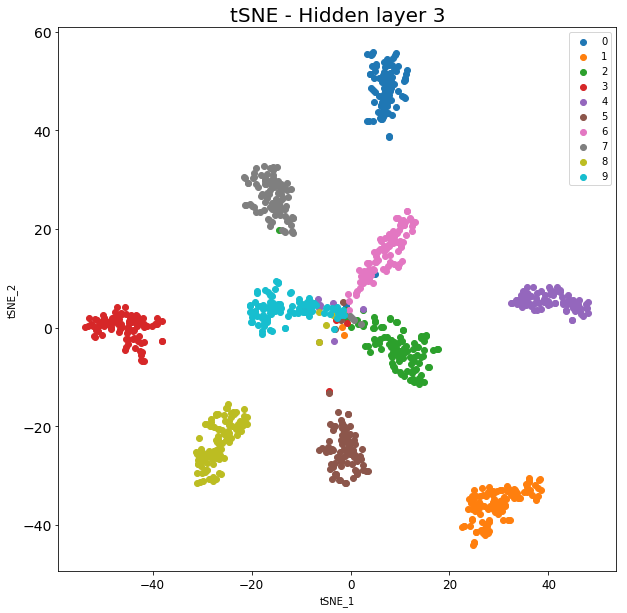

<Figure size 432x288 with 0 Axes>

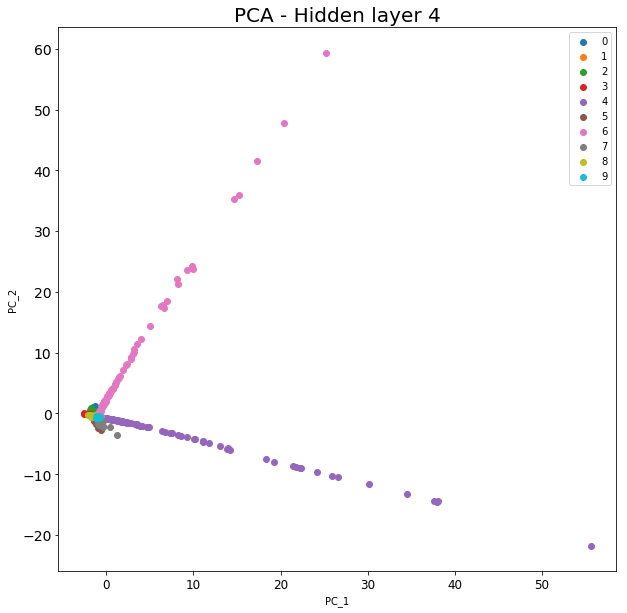

<Figure size 432x288 with 0 Axes>

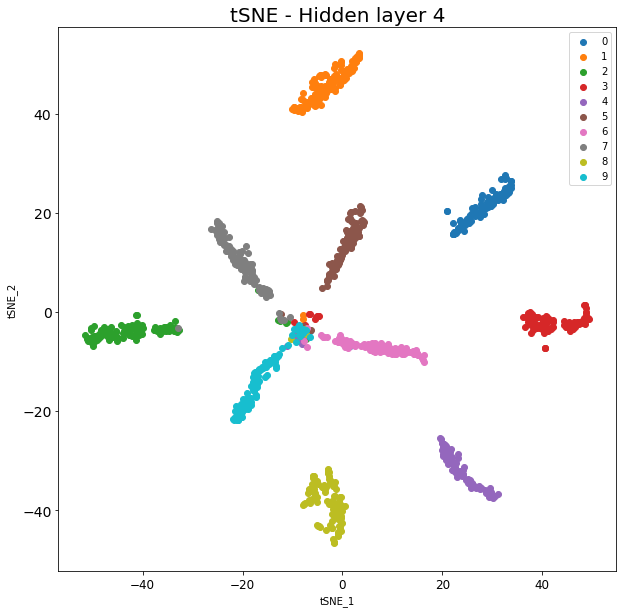

<Figure size 432x288 with 0 Axes>

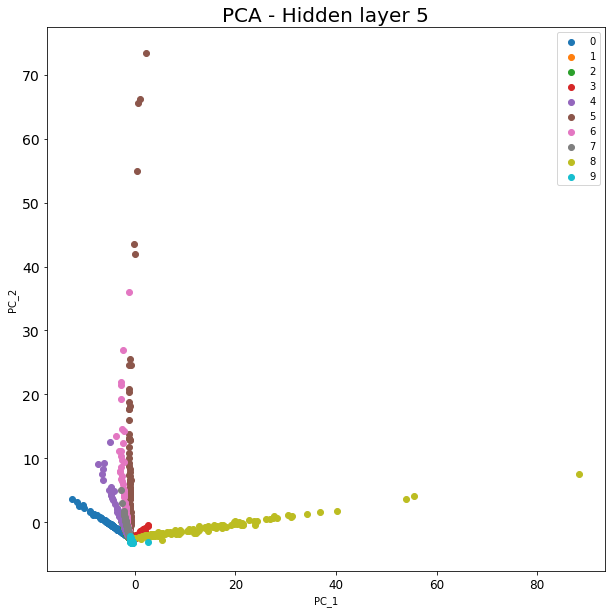

<Figure size 432x288 with 0 Axes>

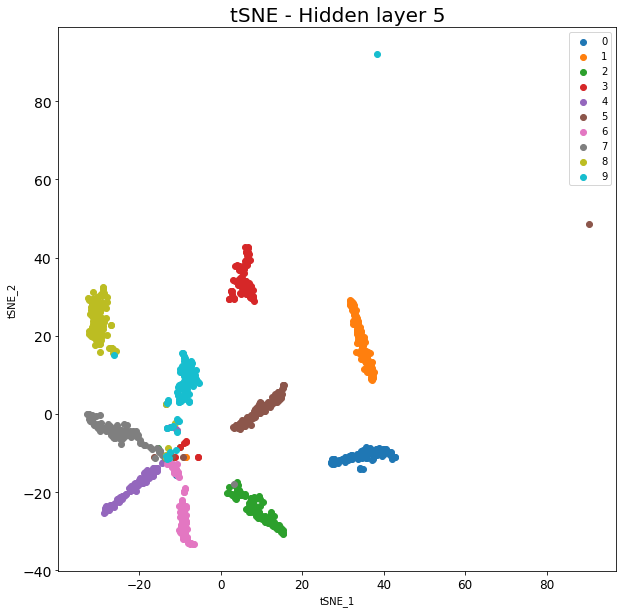

<Figure size 432x288 with 0 Axes>

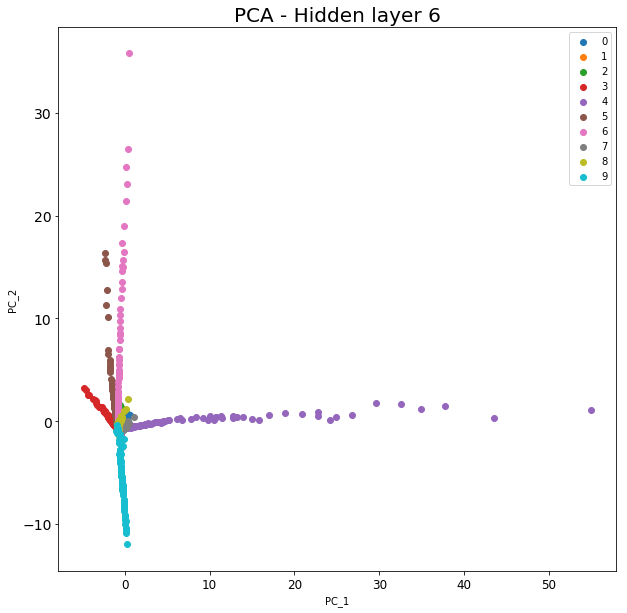

<Figure size 432x288 with 0 Axes>

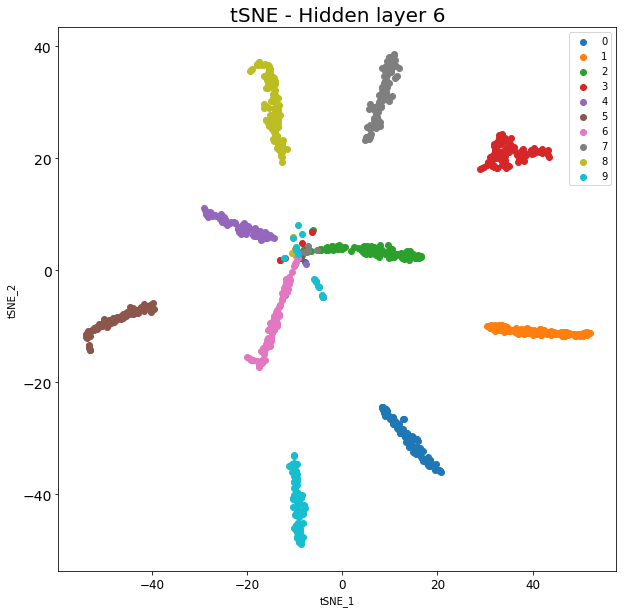

<Figure size 432x288 with 0 Axes>

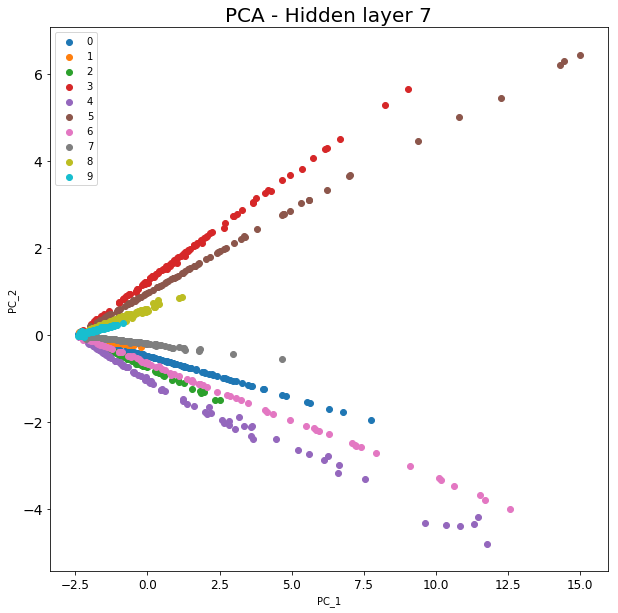

<Figure size 432x288 with 0 Axes>

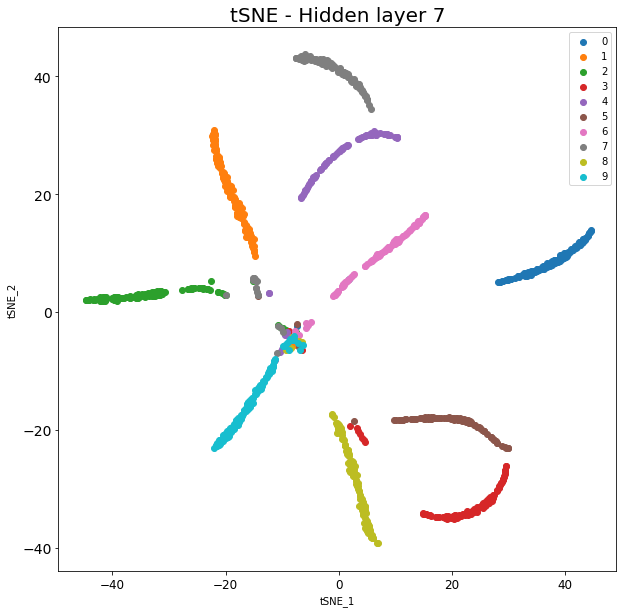

In [45]:
n=0
for layer in layers:
  n = n+1
  plot_pca_hidden(layer,n)
  plot_tsne_hidden(layer,n)